In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cmocean 

Colors from: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Colormaps from: https://matplotlib.org/tutorials/colors/colormaps.html

In [60]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

In [82]:
#testdata

n_grass = np.random.randint(0,100, (1,1000))[0]
n_bison = np.random.randint(0,80, (1,1000))[0]
avg_alt = np.random.rand(1000)
alt_sd = np.random.rand(1000) / 4

data_names =  ['Number of grass patches', 'Number of bison', 'Average altruism', 'SD altruism']
colors = ['green', 'saddlebrown', 'orange', 'moccasin']

timestep_str = 'Timesteps'
test_data = pd.DataFrame([n_grass, n_bison, avg_alt, alt_sd], data_names).T

### Lineplots

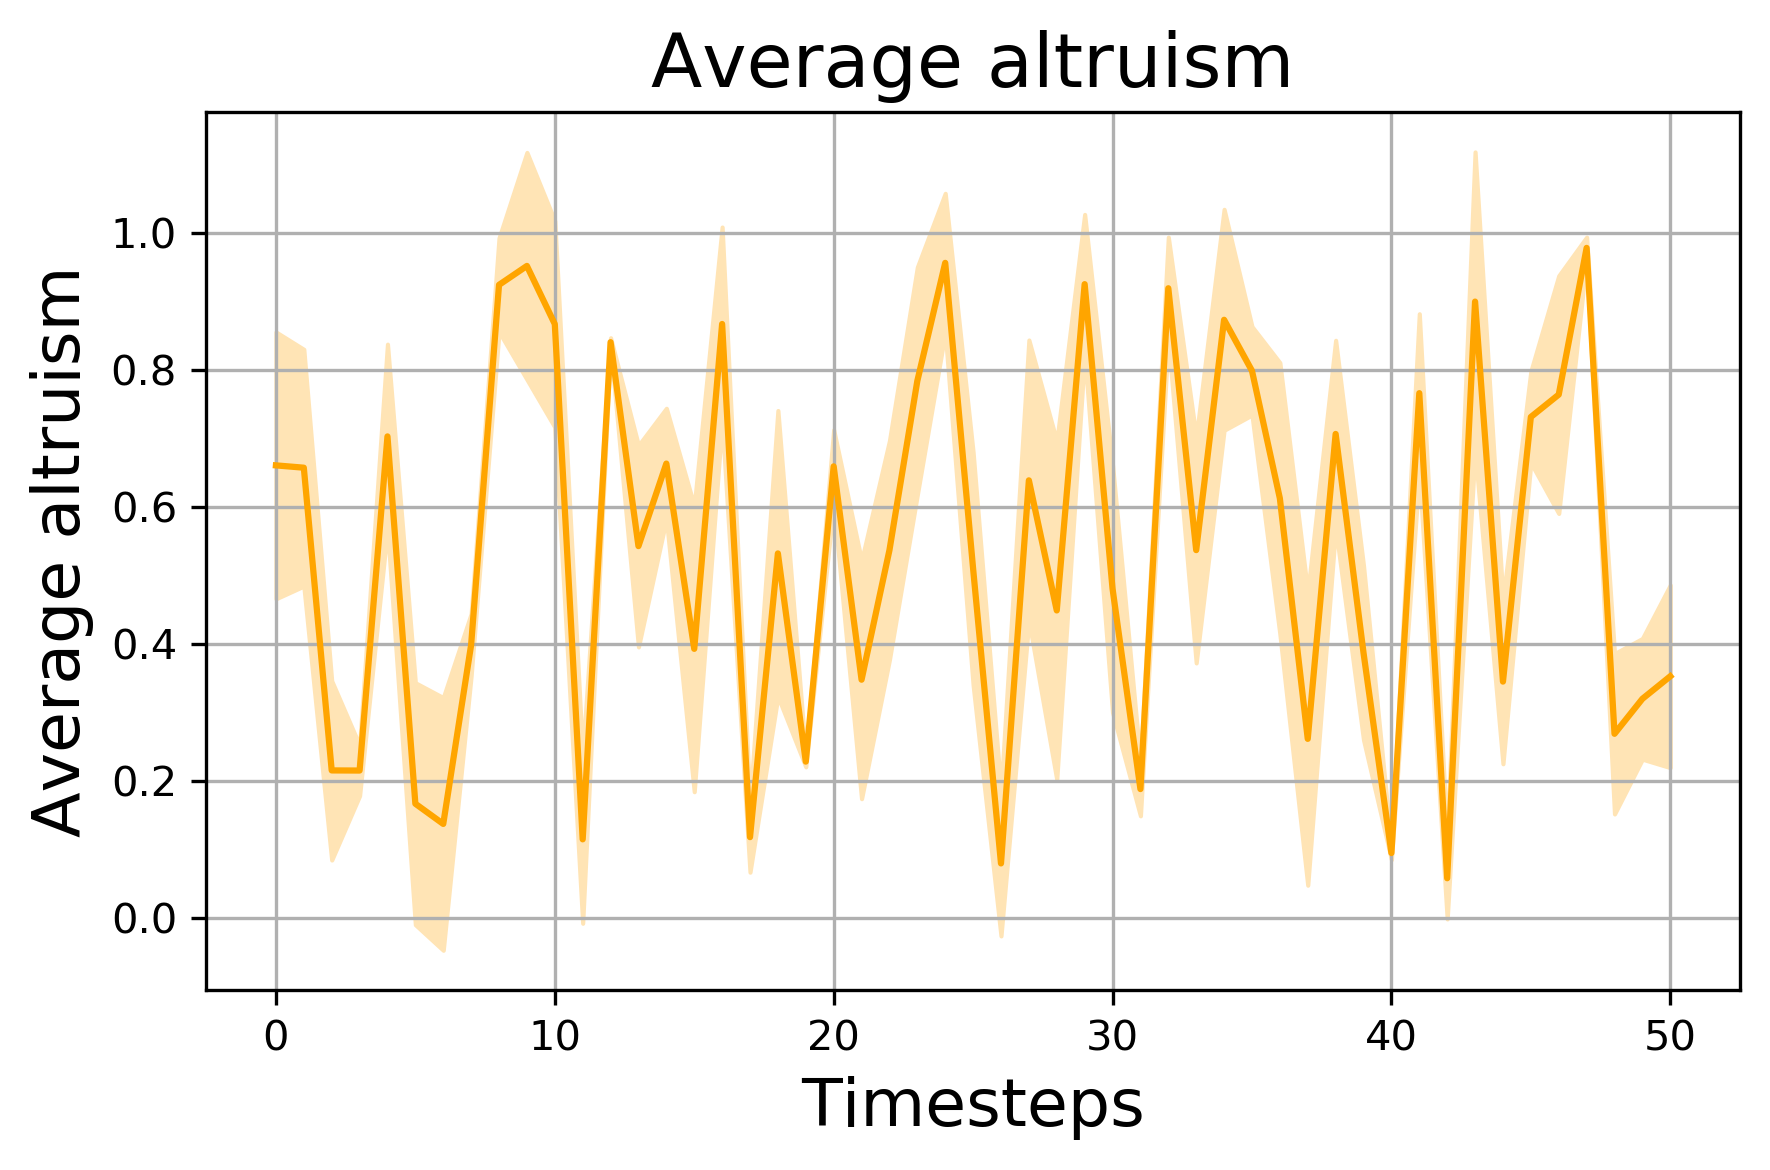

In [111]:
t0 = 0; t1 = 50
v = 3 # 1=Grass , 2=Bisons, 3=Average ALtruism, 4 SD altruism 

if v in [1,2]:
    plt.plot(test_data[data_names[v-1]].loc[t0:t1], color=colors[v-1])
if v==3: 
    x = np.arange(t0, t1+1)
    y = test_data[data_names[v-1]].loc[t0:t1]
    error = test_data[data_names[v]].loc[t0:t1]
#     plt.errorbar(x, y, yerr = error, color=colors[v-1], ecolor=colors[v])
    plt.plot(y, color=colors[v-1])
    plt.fill_between(x, y-error, y+error, color=colors[v])
plt.title(data_names[v-1])
plt.xlabel(timestep_str)
plt.ylabel(data_names[v-1])
plt.grid()
plt.tight_layout()
plt.savefig('Plots\Test_Line.png')
plt.show()

### Scatterplots

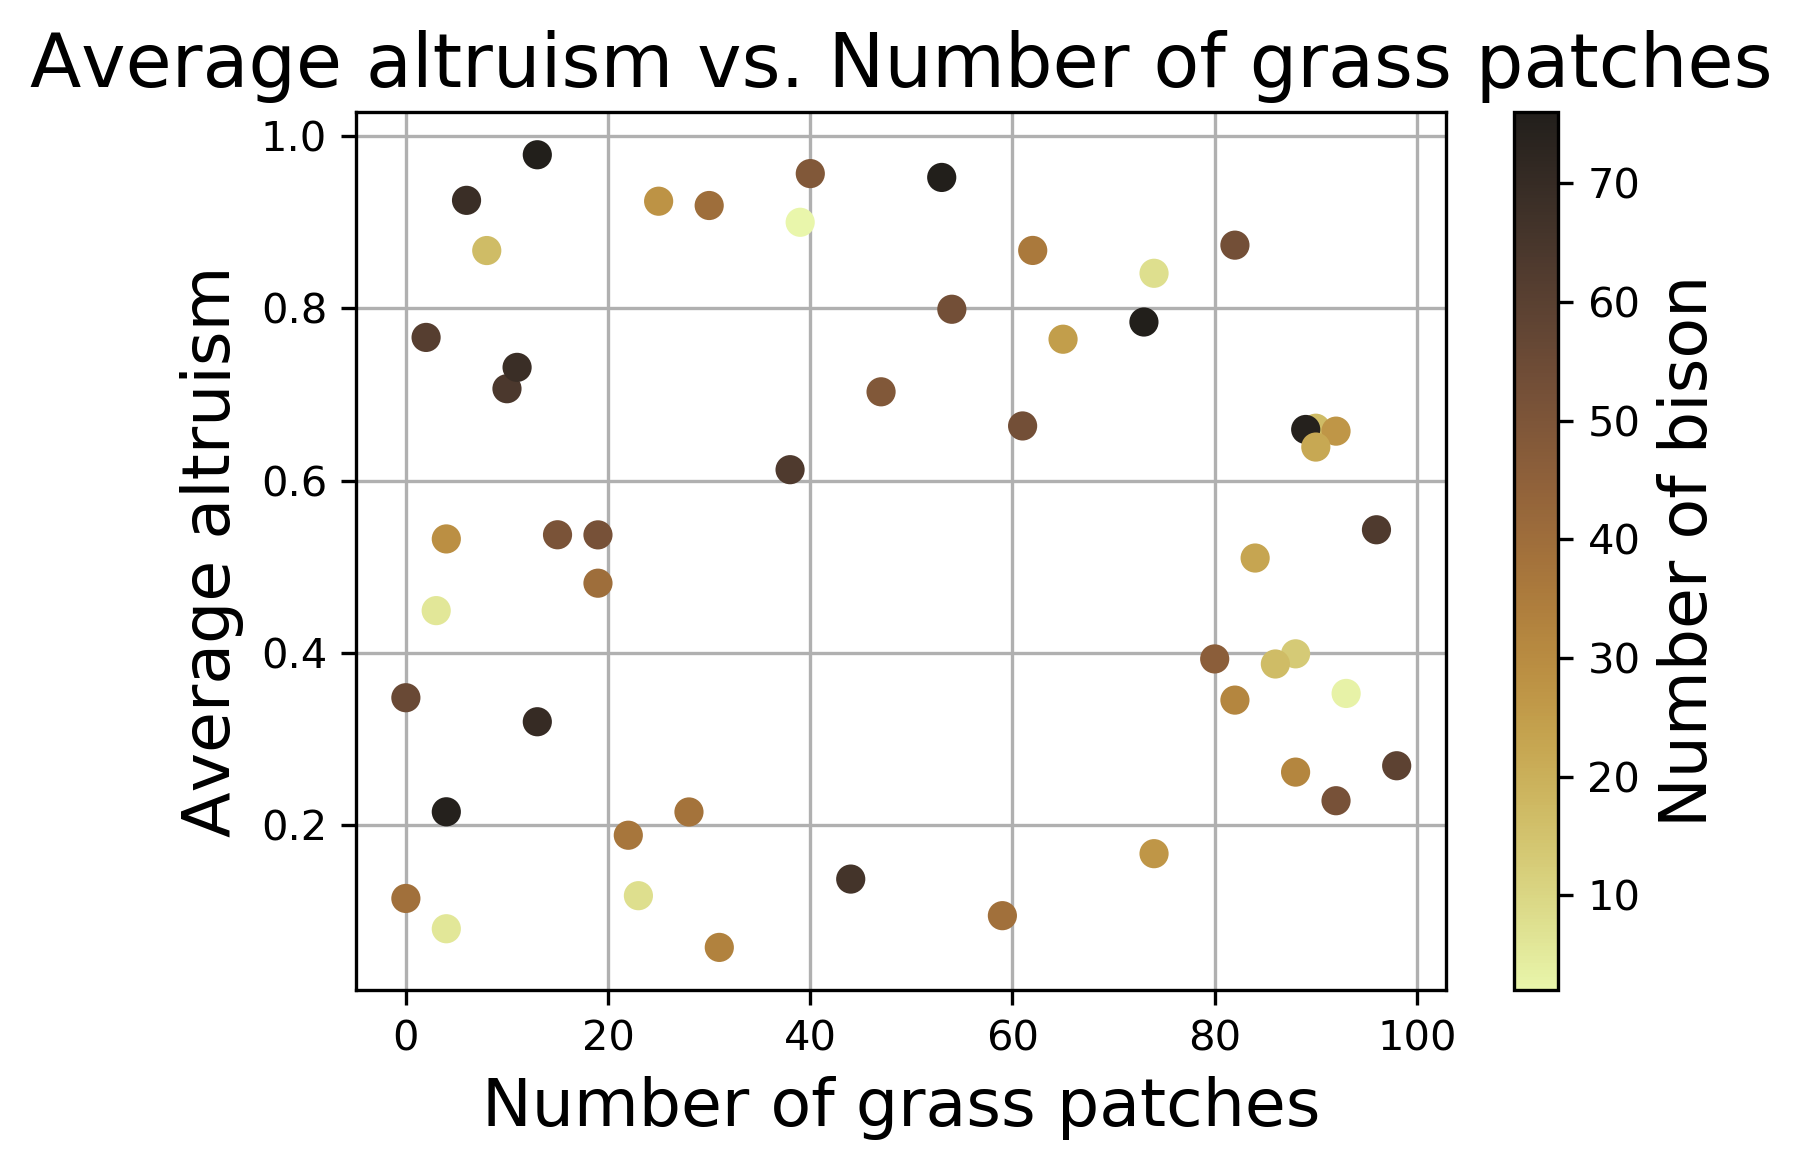

In [112]:
t0 = 0; t1 = 50
vx = 1; vy = 3; vc = 2 # 1=Grass , 2=Bisons, 3=Average ALtruism, 4 SD altruism 
# colormap = 'RdYlGn' 
colormap = cmocean.cm.turbid

x = test_data[data_names[vx-1]].loc[t0:t1]
y = test_data[data_names[vy-1]].loc[t0:t1]
c = test_data[data_names[vc-1]].loc[t0:t1]

plt.grid()
plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
plt.title(f'{data_names[vy-1]} vs. {data_names[vx-1]}')
plt.xlabel(data_names[vx-1])
plt.ylabel(data_names[vy-1])
cbar = plt.colorbar()
cbar.set_label(data_names[vc-1])
plt.tight_layout()
plt.savefig('Plots\Test_Scatter.png')
plt.show()